EDA where I explore the various columns of the historical transactions dataset. 

In [35]:
import pandas as pd
import numpy as np
from pathlib import Path

In [13]:
# By default, 13.1 GB when read as a CSV file. Can it get smaller?
# => 11.2 GB when the purchase_date date is parsed. 
# => 9.4GB when card_id is cateogrical
# => 9.2 GB when month_lag is categorical
# => 7.6 GB when authorized_flag is integer (instead of Y/N)
# => 5.9GB when cateogry_3 is categorical
# => 4.3GB when category_1 is integer (instead of Y/N)
# => 4.1GB when installments is categorical
# => 4GB when merchant_category_id is categorical
# => 3.6GB when city_id and state_id are categorical
# => 1.8GB when merchant_id is categorical
# => 1.6GB when subsector_id is categorical

In [105]:
DTYPES = {"card_id": "category", "month_lag": "category", 
                        "category_3": "category", "state_id": "category",
                        "merchant_category_id": "category", "subsector_id": "category",
                        "installments": "category",
                        "city_id": "category", "merchant_id": "category"}

In [138]:
%%timeit
df = pd.read_csv('data/historical_transactions.csv', parse_dates=['purchase_date'], 
                 dtype=DTYPES)
df.authorized_flag = np.where(df.authorized_flag == "Y", 1, 0)
df.category_1 = np.where(df.category_1 == "Y", 1, 0)

50.4 s ± 678 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
df.sample(5).T

,14072262,1891159,4500263,24497093,24350154
authorized_flag,1,1,1,1,1
card_id,C_ID_17b3b5b610,C_ID_91a95d3f21,C_ID_33bfcddb89,C_ID_64fbe9b1fa,C_ID_694fc663ff
city_id,69,69,170,331,11
category_1,N,N,N,N,N
installments,0,0,0,1,0
category_3,A,A,A,B,A
merchant_category_id,879,705,307,705,414
merchant_id,M_ID_00a6ca8a8a,M_ID_1f4773aa76,M_ID_477292fdc7,M_ID_e1a77ba40f,M_ID_d734f2611b
month_lag,-2,-5,-4,-3,-8
purchase_amount,-0.573352,-0.692392,-0.596613,-0.717486,-0.700326


In [139]:
df.describe()

,authorized_flag,category_1,purchase_amount,category_2
count,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07
mean,9.135450e-01,7.158571e-02,3.640090e-02,2.194578e+00
std,2.810348e-01,2.578007e-01,1.123522e+03,1.531896e+00
min,0.000000e+00,0.000000e+00,-7.469078e-01,1.000000e+00
25%,1.000000e+00,0.000000e+00,-7.203559e-01,1.000000e+00
50%,1.000000e+00,0.000000e+00,-6.883495e-01,1.000000e+00
75%,1.000000e+00,0.000000e+00,-6.032543e-01,3.000000e+00
max,1.000000e+00,1.000000e+00,6.010604e+06,5.000000e+00


In [140]:
df.dtypes

authorized_flag                  int64
card_id                       category
city_id                       category
category_1                       int64
installments                  category
category_3                    category
merchant_category_id          category
merchant_id                   category
month_lag                     category
purchase_amount                float64
purchase_date           datetime64[ns]
category_2                     float64
state_id                      category
subsector_id                  category
dtype: object

In [141]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         int64
card_id                 category
city_id                 category
category_1              int64
installments            category
category_3              category
merchant_category_id    category
merchant_id             category
month_lag               category
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                category
subsector_id            category
dtypes: category(9), datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 GB



```
Columns	Description
card_id	Card identifier
month_lag	month lag to reference date
purchase_date	Purchase date
authorized_flag	Y' if approved, 'N' if denied
category_3	anonymized category
installments	number of installments of purchase
category_1	anonymized category
merchant_category_id	Merchant category identifier (anonymized )
subsector_id	Merchant category group identifier (anonymized )
merchant_id	Merchant identifier (anonymized)
purchase_amount	Normalized purchase amount
city_id	City identifier (anonymized )
state_id	State identifier (anonymized )
category_2	anonymized category
```

In [96]:
df.to_parquet('data/historical_transactions.parquet', engine='pyarrow')

In [97]:
!ls -alth data/historical_transactions.*

-rw-r--r-- 1 yassinealouini yassinealouini 704M janv. 20 20:53 data/historical_transactions.parquet
-rw------- 1 yassinealouini yassinealouini 2,7G nov.  23 21:10 data/historical_transactions.csv


In [106]:
%%timeit
optimized_df = pd.read_parquet('data/historical_transactions.parquet', 
                               engine='pyarrow')
# Since pandas.to_parquet doesn't save the categorical metadata, we need to restore it after loading.
for col in DTYPES:
    optimized_df[col] = optimized_df[col].astype("category")

18.4 s ± 637 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
optimized_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         int64
card_id                 category
city_id                 category
category_1              int64
installments            category
category_3              category
merchant_category_id    category
merchant_id             category
month_lag               category
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                category
subsector_id            category
dtypes: category(9), datetime64[ns](1), float64(2), int64(2)
memory usage: 1.8 GB


In [99]:
optimized_df.sample(5).T

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
2120516,1,C_ID_8935bdea8e,158,0,1,B,367,M_ID_fb6254dc78,-13,-0.711941,2017-01-30 10:36:23,1.0,15,16
25805451,1,C_ID_95fbe00292,25,0,0,A,309,M_ID_903424c542,-1,-0.716855,2018-01-16 11:12:58,3.0,7,21
23833355,1,C_ID_f069d11559,233,0,1,B,180,M_ID_aa1880adb4,-1,-0.706336,2017-09-14 19:09:00,1.0,9,20
11739506,1,C_ID_284d017bb9,158,0,1,B,454,M_ID_412a00d1f8,-10,-0.735638,2017-04-30 10:57:45,1.0,15,39
14604571,1,C_ID_23c62b0c95,279,0,1,B,307,M_ID_14cdf0bdc8,-2,-0.671775,2017-12-07 12:36:18,1.0,9,19


# Card id

In [14]:
# How many? How many unique?

df.card_id.nunique(), df.card_id.shape[0]

(325540, 29112361)

In [15]:
df.sample(5).card_id

7516309     C_ID_2e4be53f46
22095738    C_ID_bfdca3bd9b
21959864    C_ID_8ea60360fd
9508856     C_ID_a048733ac8
21012456    C_ID_c02df647cd
Name: card_id, dtype: object

=> Can be categorized. 

In [17]:
pd.Categorical(df.card_id)

[C_ID_4e6213e9bc, C_ID_4e6213e9bc, C_ID_4e6213e9bc, C_ID_4e6213e9bc, C_ID_4e6213e9bc, ..., C_ID_2863d2fa95, C_ID_2863d2fa95, C_ID_5c240d6e3c, C_ID_5c240d6e3c, C_ID_5c240d6e3c]
Length: 29112361
Categories (325540, object): [C_ID_00007093c1, C_ID_0001238066, C_ID_0001506ef0, C_ID_0001793786, ..., C_ID_ffff579d3a, C_ID_ffff756266, C_ID_ffff828181, C_ID_fffffd5772]

In [ ]:
# TODO: category_2 are different between the two files. Investigate...

In [128]:
optimized_df['category_2'].dtype

dtype('float64')

In [121]:
for col in df.columns:
    print(col)
    print((optimized_df[col] != df[col]).sum())

authorized_flag
0
card_id
0
city_id
0
category_1
0
installments
0
category_3
0
merchant_category_id
0
merchant_id
0
month_lag
0
purchase_amount
0
purchase_date
0
category_2
2652864
state_id
0
subsector_id
0


# Month lag

In [23]:
df.month_lag.nunique()

14

In [24]:
df.sample(5).month_lag

683444      -9
22399539    -5
11438601   -11
8390517     -4
29025507     0
Name: month_lag, dtype: int64

=> Can be categorized

In [25]:
pd.Categorical(df.month_lag)

[-8, -7, -6, -5, -11, ..., -1, 0, 0, -1, -2]
Length: 29112361
Categories (14, int64): [-13, -12, -11, -10, ..., -3, -2, -1, 0]

# Purchase date

In [16]:
df.purchase_date.nunique()

16395300

In [15]:
df.sample(5).purchase_date

5401121     2017-12-16 08:54:53
24600244    2017-12-22 13:13:17
6204403     2018-02-09 01:41:24
19366142    2018-01-07 12:52:41
15398050    2018-01-11 16:32:31
Name: purchase_date, dtype: object

=> Might need to round this timestamp information and extract some calendar features from it?

# Authorized flag

Whether or not the purchase has been approved.

In [49]:
df.authorized_flag = df.authorized_flag.astype(int)

In [33]:
pd.np.where(df.authorized_flag == "Y", 1, 0)

array([1, 1, 1, ..., 1, 1, 1])

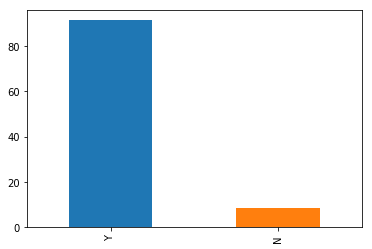

In [27]:
df.authorized_flag.value_counts(normalize=True).mul(100).plot(kind='bar')

# Categories (1, 2, and 3)

Anonymized categporical features

In [29]:
df.category_1.unique(), df.category_2.unique(), df.category_3.unique()

(array(['N', 'Y'], dtype=object),
 array([  1.,  nan,   3.,   5.,   2.,   4.]),
 array(['A', 'B', 'C', nan], dtype=object))

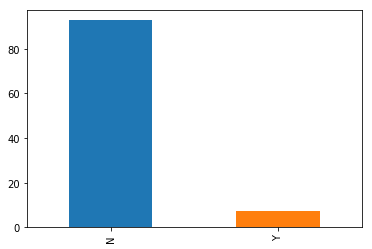

In [31]:
df.category_1.value_counts(normalize=True, dropna=False).mul(100).plot(kind='bar')

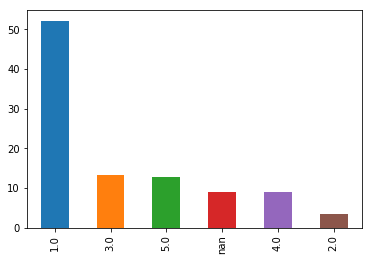

In [32]:
df.category_2.value_counts(normalize=True, dropna=False).mul(100).plot(kind='bar')

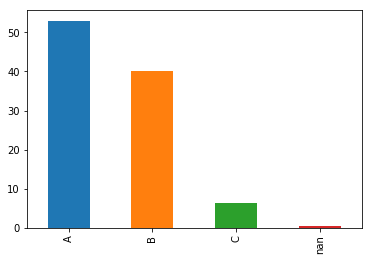

In [33]:
df.category_3.value_counts(normalize=True, dropna=False).mul(100).plot(kind='bar')

=> These categories should be transformed into numerical values so that they can be used by the ML model.

# Installments

In [68]:
df.installments.nunique()

15

In [69]:
df.installments.value_counts(normalize=True, dropna=False).mul(100).plot(kind='bar')

In [71]:
df.installments = df.installments.astype('category')

Is 999 a "placeholder" for missing data? Or is it for any number bigger than 11?

# Merchant columns

## Category id 

In [74]:
df.sample(5).merchant_category_id

14865098    879
5080919     367
21528015    422
7574535     705
13830590    683
Name: merchant_category_id, dtype: int64

In [75]:
df.merchant_category_id.nunique()

327

In [76]:
df.merchant_category_id = df.merchant_category_id.astype('category')

## Id 

In [43]:
df.merchant_id.nunique()

326311

In [86]:
df.merchant_id = df.merchant_id.astype('category')

In [ ]:
## Subsector id

In [44]:
df.subsector_id.nunique()

41

In [90]:
df.subsector_id = df.subsector_id.astype('category')

# City columns

## Id

In [80]:
df.city_id.nunique()

308

In [82]:
df.city_id = df.city_id.astype('category')

## State Id

In [81]:
df.state_id.nunique()

25

In [83]:
df.state_id = df.state_id.astype('category')

## Purchase amount

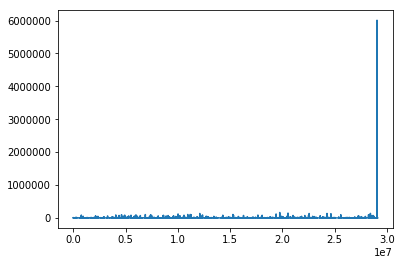

In [49]:
# TODO: Find a better plot for this function
df.purchase_amount.plot()